# Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

•  For the arriving airport, you can use the Destination column in the searches file. 

• Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

• Bonus point: Solving this problem using pandas (instead of any other approach)

## Action plan

1. In 'Searches' sample:
    - Create column *'Month'* by using *'Date'* column
    - Filter by *'Destination'* : 'MAD', 'BCN' and 'AGP'
    - Group by *'Month'* each *'Destination'* and count the number of observations.
    - Plot results
        

2. In 'Booking' sample by using chunks:
    - Create iterator object using parameter **nrows** to run it as a sample.
    - Create *'all_chunks'* variable as an empty list.
    - Adapt our 'Booking' sample code to be run in every chunk loop:
        - Create column *'Month'* by using *'Date'* column
        - Filter by *'Destination'* : 'MAD', 'BCN' and 'AGP'
        - Group by *'Month'* each *'Destination'* and count the number of observations.
    - Concat *all chunks* results.
    - Groupby again but adding the counts for each *'Destination'* and *'Month'*
    - Plot results
    

3. Replicate the process for the whole dataset (eliminate **nrows** parameter and adapt **chunksize**).

## Import libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

## Data Path in my computer

In [60]:
!ls /home/dsc/Data/challenge/

bookings.csv.bz2		 searches_with_bookings.csv
bookings_without_duplicates.csv  searches_without_duplicates.csv
searches.csv.bz2


## Step 1: Let's start by working with a sample of our dataset

I will use the sample we have created in Exercise 1

In [61]:
searches_sample = pd.read_csv('searches.sample.csv.bz2',compression='bz2', sep='^')

In [62]:
searches_sample.shape

(999, 45)

In [63]:
searches_sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [64]:
searches_sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [65]:
searches_sample['Month'] = searches_sample['Date'].str[-5:-3]
searches_sample['Month']

0      01
1      01
2      01
3      01
4      01
       ..
994    01
995    01
996    01
997    01
998    01
Name: Month, Length: 999, dtype: object

In [66]:
mad_searches_sample = searches_sample[ searches_sample['Destination'] == 'MAD']
bcn_searches_sample = searches_sample[ searches_sample['Destination'] == 'BCN']
mal_searches_sample = searches_sample[ searches_sample['Destination'] == 'AGP']

In [67]:
searches_mad = mad_searches_sample.groupby("Month")[['Destination']].count()
searches_mad

,Destination
Month,
01,11


In [68]:
searches_bcn = bcn_searches_sample.groupby("Month")[['Destination']].count()
searches_bcn

,Destination
Month,
01,26


In [69]:
searches_mal = mal_searches_sample.groupby("Month")[['Destination']].count()
searches_mal

,Destination
Month,
01,7


The sample is too small. We only have data for january. Let's create a bigger sample using **nrows** in **pd.read_csv()**.

In [70]:
sample = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^',nrows=100000)

In [71]:
sample.shape

(100000, 45)

In [72]:
sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [73]:
sample.head()

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,...,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
0,2013-01-01,20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
1,2013-01-01,10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2,2013-01-01,18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC
3,2013-01-01,17:42:40,FXP,1864e5e8013d9414150e91d26b6a558b,SE,RNB,ARN,0,1,RNB,...,NaN,NaN,NaN,NaN,1ASI,0,0,0,d41d8cd98f00b204e9800998ecf8427e,STO
4,2013-01-01,17:48:29,MPT,1ec336348f44207d2e0027dc3a68c118,NO,OSL,MAD,1,2,OSL,...,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,OSL


In [74]:
sample['Month'] = sample['Date'].str[-5:-3]
sample['Month']

0        01
1        01
2        01
3        01
4        01
         ..
99995    04
99996    04
99997    04
99998    04
99999    04
Name: Month, Length: 100000, dtype: object

In [75]:
mad_sample = sample[ sample['Destination'] == 'MAD']
bcn_sample = sample[ sample['Destination'] == 'BCN']
mal_sample = sample[ sample['Destination'] == 'AGP']

In [76]:
searches_mad = mad_sample.groupby("Month")[['Destination']].count()
searches_mad

,Destination
Month,
01,425
02,400
03,433
04,147


In [77]:
searches_bcn = bcn_sample.groupby("Month")[['Destination']].count()
searches_bcn

,Destination
Month,
01,517
02,497
03,536
04,174


In [78]:
searches_mal = mal_sample.groupby("Month")[['Destination']].count()
searches_mal

,Destination
Month,
01,169
02,147
03,187
04,31


In [79]:
madrid = searches_mad.reset_index()
barcelona = searches_bcn.reset_index()
malaga = searches_mal.reset_index()

Let's plot results:

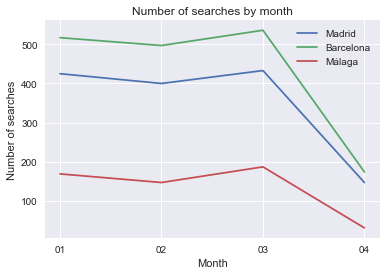

In [80]:
fig, ax = plt.subplots()

ax1= sns.lineplot(data=madrid, x='Month', y= 'Destination', label='Madrid')
ax2= sns.lineplot(data=barcelona, x='Month', y= 'Destination', label='Barcelona')
ax3= sns.lineplot(data=malaga, x='Month', y= 'Destination', label= 'Málaga')

ax.set_title('Number of searches by month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of searches')
ax.legend()

## Step 2: Let's try it now with a sample and by using chunks

I will do it now by using chunks and by fixing **nrows** parameter to set a sample in **pd.read_csv**. I will also select only *'Date'* and *'Destination'* columns in order to reduce the file size and the time of execution.

In [81]:
chksize = 10000

In [82]:
reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Destination'], nrows=100000, iterator=True, chunksize=chksize)
mad_chunks= []
bcn_chunks= []
mal_chunks= []
chunk_counter=0

for df in reader:
    df['Month'] = df['Date'].str[-5:-3]
    mad_chunk = df[ df['Destination'] == 'MAD']
    bcn_chunk = df[ df['Destination'] == 'BCN']
    mal_chunk = df[ df['Destination'] == 'AGP']
    mad_chunks.append(mad_chunk.groupby("Month")[['Destination']].count())
    bcn_chunks.append(bcn_chunk.groupby("Month")[['Destination']].count())
    mal_chunks.append(mal_chunk.groupby("Month")[['Destination']].count())
    chunk_counter+=1
    print(chunk_counter)


1
2
3
4
5
6
7
8
9
10


In [83]:
searches_mad = pd.concat(mad_chunks)
searches_bcn = pd.concat(bcn_chunks)
searches_mal = pd.concat(mal_chunks)

In [84]:
searches_mad.sample(10)

,Destination
Month,
04,147
01,148
03,141
03,145
01,11
03,14
02,155
01,125
02,116


In [85]:
madrid = searches_mad.groupby("Month")[['Destination']].sum().reset_index()
barcelona = searches_bcn.groupby("Month")[['Destination']].sum().reset_index()
malaga = searches_mal.groupby("Month")[['Destination']].sum().reset_index()

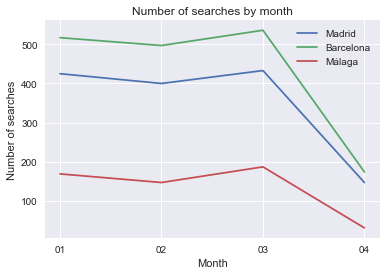

In [86]:
fig, ax = plt.subplots()

ax1= sns.lineplot(data=madrid, x='Month', y= 'Destination', label='Madrid')
ax2= sns.lineplot(data=barcelona, x='Month', y= 'Destination', label='Barcelona')
ax3= sns.lineplot(data=malaga, x='Month', y= 'Destination', label= 'Málaga')

ax.set_title('Number of searches by month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of searches')
ax.legend()

## Step 3: Let's try it now with the whole dataset

I will do it by using chunks and by selecting only *'Date'* and *'Destination'* columns in order to reduce the file size and the time of execution (no **nrows** parameter this time). I will also adapt **chunksize**. 

In [87]:
chksize = 500000

In [88]:
reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Destination'], iterator=True, chunksize=chksize)
mad_chunks= []
bcn_chunks= []
mal_chunks= []
chunk_counter=0

for df in reader:
    df['Month'] = df['Date'].str[-5:-3]
    mad_chunk = df[ df['Destination'] == 'MAD']
    bcn_chunk = df[ df['Destination'] == 'BCN']
    mal_chunk = df[ df['Destination'] == 'AGP']
    mad_chunks.append(mad_chunk.groupby("Month")[['Destination']].count())
    bcn_chunks.append(bcn_chunk.groupby("Month")[['Destination']].count())
    mal_chunks.append(mal_chunk.groupby("Month")[['Destination']].count())
    chunk_counter+=1
    print(chunk_counter)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41


In [89]:
searches_mad = pd.concat(mad_chunks)
searches_bcn = pd.concat(bcn_chunks)
searches_mal = pd.concat(mal_chunks)

In [90]:
madrid = searches_mad.groupby("Month")[['Destination']].sum().reset_index()
barcelona = searches_bcn.groupby("Month")[['Destination']].sum().reset_index()
malaga = searches_mal.groupby("Month")[['Destination']].sum().reset_index()

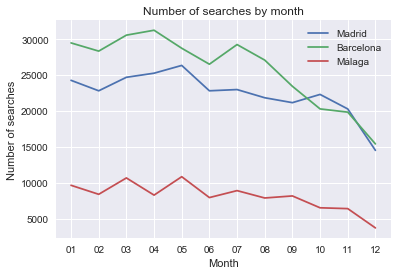

In [91]:
fig, ax = plt.subplots()

ax1= sns.lineplot(data=madrid, x='Month', y= 'Destination', label='Madrid')
ax2= sns.lineplot(data=barcelona, x='Month', y= 'Destination', label='Barcelona')
ax3= sns.lineplot(data=malaga, x='Month', y= 'Destination', label= 'Málaga')

ax.set_title('Number of searches by month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of searches')
ax.legend()

## Step 4: Bonus Point

Repeat the process dropping searches duplicated.

In [92]:
searches_sample.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice', 'Month'],
      dtype='object')

In order to define unique searches we will use 'Date', 'Time','OfficeID' and 'TerminalID' to drop duplicates.

Let's try first with a sample:

In [93]:
chksize = 10000

In [94]:
reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Time','OfficeID','TerminalID','Origin','Destination'], nrows=100000, iterator=True, chunksize=chksize)
all_chunks= []
chunk_counter=0

for df in reader:
    all_chunks=all_chunks.append(df)
    all_chunks.drop_duplicates(inplace=True)
    chunk_counter+=1
    print(chunk_counter)

AttributeError: 'NoneType' object has no attribute 'drop_duplicates'

In order to be able to use **pd.drop_duplicates()** method we will have to set *'all_chunks'* variable as an empty pandas dataframe. 

In [95]:
reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Time','OfficeID','TerminalID', 'Origin','Destination'], nrows=100000, iterator=True, chunksize=chksize)
all_chunks= pd.DataFrame()
chunk_counter=0

for df in reader:
    all_chunks=all_chunks.append(df)
    all_chunks.drop_duplicates(inplace=True)
    chunk_counter+=1
    print(chunk_counter)

1
2
3
4
5
6
7
8
9
10


In [96]:
all_chunks.shape

(100000, 6)

Apparently there were not duplicates in our sample so let's try it again with the whole dataset droping **nrows** parameter from **pd.read_csv()**:

In [97]:
chksize = 200000

In [98]:
%%time

reader = pd.read_csv('/home/dsc/Data/challenge/searches.csv.bz2',compression='bz2',sep='^', usecols=['Date','Time','OfficeID','TerminalID','Origin','Destination'], iterator=True, chunksize=chksize)
all_chunks= pd.DataFrame()
chunk_counter=0

for df in reader:
    all_chunks=all_chunks.append(df)
    all_chunks.drop_duplicates(inplace=True)
    chunk_counter+=1
    print(chunk_counter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
CPU times: user 5min 3s, sys: 4.58 s, total: 5min 7s
Wall time: 4min 33s


In [99]:
all_chunks.shape

(359004, 6)

In [100]:
all_chunks.sample(10)

,Date,Time,OfficeID,Origin,Destination,TerminalID
3344,2013-01-04,06:13:55,0705326b6409fb82a22671503c9173f8,FRA,MIA,d41d8cd98f00b204e9800998ecf8427e
126019,2013-05-07,01:10:45,0632d0675e69cac2473475b2261fc4b9,LGA,MAA,d41d8cd98f00b204e9800998ecf8427e
53529,2013-02-23,06:54:01,6ec95b5d47a8864fb45dd8c2265b4462,SYD,HND,d41d8cd98f00b204e9800998ecf8427e
226615,2013-08-15,10:48:33,72cd5771a011d244c15f9ab2efeb8188,DME,BKK,d41d8cd98f00b204e9800998ecf8427e
83529,2013-03-25,12:35:41,1f42a2bd5363e726edb4a6ea3b20647f,LON,BOM,d41d8cd98f00b204e9800998ecf8427e
279432,2013-10-07,23:35:22,7da60d9e60a322d3fff7e00cb62baa53,SAO,SJP,d41d8cd98f00b204e9800998ecf8427e
230348,2013-08-19,10:18:54,3565e31495ecfd46fa018339d20382b1,AQI,GIZ,d41d8cd98f00b204e9800998ecf8427e
105960,2013-04-16,07:14:48,fbc81cde11a823167dc294cea1333619,ELP,CUZ,d41d8cd98f00b204e9800998ecf8427e
144094,2013-05-25,12:58:54,6d86844eb232bfe103c7e35035c1bf29,MIA,OPO,d41d8cd98f00b204e9800998ecf8427e
251809,2013-09-09,08:15:29,8a920c89312c383c860f9faf2e693b84,ZRH,NYC,d41d8cd98f00b204e9800998ecf8427e


After dropping duplicates we only have 359003 rows to work with.

Let's continue with our analysis:

In [101]:
all_chunks.to_csv('/home/dsc/Data/challenge/searches_without_duplicates.csv',sep='^')

In [102]:
!ls /home/dsc/Data/challenge/

bookings.csv.bz2		 searches_with_bookings.csv
bookings_without_duplicates.csv  searches_without_duplicates.csv
searches.csv.bz2


In [103]:
chksize=10000

In [104]:
reader = pd.read_csv('/home/dsc/Data/challenge/searches_without_duplicates.csv', sep='^', usecols=['Date','Destination'], iterator=True, chunksize=chksize)
mad_chunks= []
bcn_chunks= []
mal_chunks= []
chunk_counter=0

for df in reader:
    df['Month'] = df['Date'].str[-5:-3]
    mad_chunk = df[ df['Destination'] == 'MAD']
    bcn_chunk = df[ df['Destination'] == 'BCN']
    mal_chunk = df[ df['Destination'] == 'AGP']
    mad_chunks.append(mad_chunk.groupby("Month")[['Destination']].count())
    bcn_chunks.append(bcn_chunk.groupby("Month")[['Destination']].count())
    mal_chunks.append(mal_chunk.groupby("Month")[['Destination']].count())
    chunk_counter+=1
    print(chunk_counter)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [105]:
searches_mad = pd.concat(mad_chunks)
searches_bcn = pd.concat(bcn_chunks)
searches_mal = pd.concat(mal_chunks)

In [106]:
madrid = searches_mad.groupby("Month")[['Destination']].sum().reset_index()
barcelona = searches_bcn.groupby("Month")[['Destination']].sum().reset_index()
malaga = searches_mal.groupby("Month")[['Destination']].sum().reset_index()

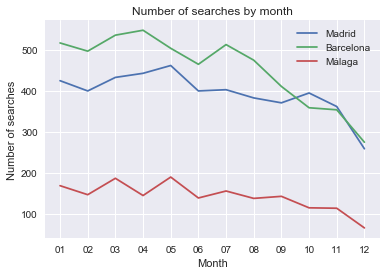

In [107]:
fig, ax = plt.subplots()

ax1= sns.lineplot(data=madrid, x='Month', y= 'Destination', label='Madrid')
ax2= sns.lineplot(data=barcelona, x='Month', y= 'Destination', label='Barcelona')
ax3= sns.lineplot(data=malaga, x='Month', y= 'Destination', label= 'Málaga')

ax.set_title('Number of searches by month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of searches')
ax.legend()

# THANK YOUR FOR FOLLOWING

If you have any question, do not hesitate to contact me on Linkedin: https://www.linkedin.com/in/laurajmoreno/